# Analiza 'glipses' u govornom materijalu


In [1]:
work_version_num = 5.0
word_version_suffix = ""
work_version = f"v{work_version_num}{word_version_suffix}"

print(work_version)

v5.0


# [1] Generating a structured nested dictionary

In [3]:
# Define the structure of the nested dictionary
data = {
    'SNR_-2': {
        'govornik_1': {},
        'govornik_2': {},
        'govornik_3': {},
        'govornik_4': {}
    },
    'SNR_+0': {
        'govornik_1': {},
        'govornik_2': {},
        'govornik_3': {},
        'govornik_4': {}
    },
    'SNR_+2': {
        'govornik_1': {},
        'govornik_2': {},
        'govornik_3': {},
        'govornik_4': {}
    }
}

# Define the stimuli
stimuli = ['apa',
           'ata',
           'aka',
           'aba',
           'ada',
           'aga',
           'asa',
           'aša',
           'aza',
           'aža',
           'afa',
           'aha',
           'aca',
           'ača',
           'ađa',
           'aja',
           'ana',
           'ama',
           'ara',
           'ala',
           'ava']

# Initialize the nested dictionary with empty lists for each stimulus
for snr in data:
    for speaker in data[snr]:
        for stimulus in stimuli:
            data[snr][speaker][stimulus] = []

print(f"len(data): {len(data)}")
print(f"data.keys(): {data.keys()}")
print(f"len(data.keys()): {len(data.keys())}")

len(data): 3
data.keys(): dict_keys(['SNR_-2', 'SNR_+0', 'SNR_+2'])
len(data.keys()): 3


In [4]:
# Print the number of noise conditions
print(f"Number of noise conditions: {len(data)}")
print(f"Noise conditions: {list(data.keys())}")

# Iterate over each noise condition to print the number of speakers and stimuli
for snr_condition, speakers in data.items():
    print(f"\nNoise condition: {snr_condition}")
    
    # Number of speakers in the current noise condition
    num_speakers = len(speakers)
    print(f"  Number of speakers: {num_speakers}")
    print(f"  Speakers: {list(speakers.keys())}")
    
    # Iterate over each speaker to print the number of stimuli
    for speaker, stimuli in speakers.items():
        num_stimuli = len(stimuli)
        print(f"    Speaker: {speaker}")
        print(f"      Number of stimuli: {num_stimuli}")
        print(f"      Stimuli: {list(stimuli.keys())}")


Number of noise conditions: 3
Noise conditions: ['SNR_-2', 'SNR_+0', 'SNR_+2']

Noise condition: SNR_-2
  Number of speakers: 4
  Speakers: ['govornik_1', 'govornik_2', 'govornik_3', 'govornik_4']
    Speaker: govornik_1
      Number of stimuli: 21
      Stimuli: ['apa', 'ata', 'aka', 'aba', 'ada', 'aga', 'asa', 'aša', 'aza', 'aža', 'afa', 'aha', 'aca', 'ača', 'ađa', 'aja', 'ana', 'ama', 'ara', 'ala', 'ava']
    Speaker: govornik_2
      Number of stimuli: 21
      Stimuli: ['apa', 'ata', 'aka', 'aba', 'ada', 'aga', 'asa', 'aša', 'aza', 'aža', 'afa', 'aha', 'aca', 'ača', 'ađa', 'aja', 'ana', 'ama', 'ara', 'ala', 'ava']
    Speaker: govornik_3
      Number of stimuli: 21
      Stimuli: ['apa', 'ata', 'aka', 'aba', 'ada', 'aga', 'asa', 'aša', 'aza', 'aža', 'afa', 'aha', 'aca', 'ača', 'ađa', 'aja', 'ana', 'ama', 'ara', 'ala', 'ava']
    Speaker: govornik_4
      Number of stimuli: 21
      Stimuli: ['apa', 'ata', 'aka', 'aba', 'ada', 'aga', 'asa', 'aša', 'aza', 'aža', 'afa', 'aha', 'aca',

In [5]:
def explore_dict(d, level=0):
    indent = "  " * level
    if isinstance(d, dict):
        for key, value in d.items():
            print(f"{indent}Key: {key} (Type: {type(value).__name__})")
            explore_dict(value, level + 1)
    elif isinstance(d, list):
        if len(d) > 0:
            print(f"{indent}List of {len(d)} items (Type: {type(d[0]).__name__})")
        else:
            print(f"{indent}Empty list")
    else:
        print(f"{indent}Value: {d} (Type: {type(d).__name__})")

# Example usage
explore_dict(data)


Key: SNR_-2 (Type: dict)
  Key: govornik_1 (Type: dict)
    Key: apa (Type: list)
      Empty list
    Key: ata (Type: list)
      Empty list
    Key: aka (Type: list)
      Empty list
    Key: aba (Type: list)
      Empty list
    Key: ada (Type: list)
      Empty list
    Key: aga (Type: list)
      Empty list
    Key: asa (Type: list)
      Empty list
    Key: aša (Type: list)
      Empty list
    Key: aza (Type: list)
      Empty list
    Key: aža (Type: list)
      Empty list
    Key: afa (Type: list)
      Empty list
    Key: aha (Type: list)
      Empty list
    Key: aca (Type: list)
      Empty list
    Key: ača (Type: list)
      Empty list
    Key: ađa (Type: list)
      Empty list
    Key: aja (Type: list)
      Empty list
    Key: ana (Type: list)
      Empty list
    Key: ama (Type: list)
      Empty list
    Key: ara (Type: list)
      Empty list
    Key: ala (Type: list)
      Empty list
    Key: ava (Type: list)
      Empty list
  Key: govornik_2 (Type: dict)
    Key: a

## Skip to [7] for MFCC, stop by [4] to load a Dictionary

# [2] Main audio file STFT analysis and dict populating

Takes about 34s to finish

In [3]:
%%time

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.io import wavfile
from scipy.signal import stft

# Define parameters
speakers = ['govornik_1', 'govornik_2', 'govornik_3', 'govornik_4']
snr_conditions = ['SNR_-2', 'SNR_+0', 'SNR_+2']

# Map speaker to SSN_gX part
speaker_mapping = {
    'govornik_1': 'g1',
    'govornik_2': 'g2',
    'govornik_3': 'g3',
    'govornik_4': 'g4'
}

# Map SNR condition to the corresponding number
snr_mapping = {
    'SNR_-2': '70',
    'SNR_+0': '68',
    'SNR_+2': '66'
}

# SNR filename prefix mapping
snr_prefix_mapping = {
    'SNR_-2': 'S1',
    'SNR_+0': 'S2',
    'SNR_+2': 'S3'
}

# Base paths
base_path = r'C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\Diplomski Rad\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV\SSN all all'
base_speech_mask_path = r'C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\Diplomski Rad\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV'

# Initialize the data dictionary
data = {snr: {speaker: {} for speaker in speakers} for snr in snr_conditions}

def process_and_store_data(speaker, snr_condition, stimulus, speech_mask_file_path, mask, sr, snr_prefix):
    # Load the speech + mask audio file
    _, speech_mask = wavfile.read(speech_mask_file_path)

    # Determine the minimum length of the audio files
    min_length = min(len(mask), len(speech_mask))

    # Trim the audio files to the minimum length
    mask = mask[:min_length]
    speech_mask = speech_mask[:min_length]

    # Compute STFT
    f, t, mask_stft = stft(mask, sr)
    _, _, speech_mask_stft = stft(speech_mask, sr)

    # Convert to power spectrograms (magnitude squared)
    mask_power = np.abs(mask_stft)**2 # Adding a slightly larger value to avoid division by zero
    speech_mask_power = np.abs(speech_mask_stft)**2

    # Calculate SNR
    snr = 10 * np.log10(speech_mask_power / (mask_power + 1e-3))  # Adding a slightly larger value to avoid division by zero

    # Normalize SNR values to the range [0, 1]
    snr_normalized = (snr - np.min(snr)) / (np.max(snr) - np.min(snr))

    # Set values where SNR <= 3 to 0
    glimpses = np.where(snr > 3, snr_normalized, 0)
    
    # Trim the glimpses array if its length is longer than the shortest length
    shortest_length = min(len(glimpses[1]), len(mask))  # Calculate the shortest length among glimpses and mask
    if len(glimpses[1]) > shortest_length:  # Check the length along the second axis
        trim_length = len(glimpses[1]) - shortest_length
        trim_start = trim_length // 2
        trim_end = len(glimpses[1]) - (trim_length - trim_start)
        glimpses = glimpses[:, trim_start:trim_end]  # Trim along the second axis

    # Store the data in the dictionary
    data[snr_condition][speaker][stimulus] = {
        'original': speech_mask,
        'mask': mask,
        'glimpses': glimpses,
        'time': t,
        'frequency': f
    }

    # Visualize the glimpses on the spectrogram
    plt.figure(figsize=(10, 3))
    plt.pcolormesh(t, f, glimpses, shading='nearest', cmap='gray_r', vmin=0, vmax=1)
    
    title = f'{snr_prefix}{stimulus}'
    plt.title(title + ' - Glimpses (SNR > 3 dB)')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.tight_layout()
    
    # Save the plot as a .png file in the same directory, including the SNR prefix
    output_filename = os.path.join(os.path.dirname(speech_mask_file_path), f'{title}.png'.replace(' ', '_'))
    plt.savefig(output_filename, format='png', bbox_inches='tight')
    plt.close()  # Close the plot to free memory




# Iterate over all speakers and SNR conditions
for speaker in speakers:
    for snr_condition in snr_conditions:
        ssn_part = speaker_mapping[speaker]
        snr_number = snr_mapping[snr_condition]

        # Construct the mask_dir path using string formatting
        mask_dir = f'{base_path}\SSN_{ssn_part}_{snr_number}.wav'
        
        # Construct the speech_mask_dir path using string formatting
        speech_mask_folder_mapping = {
            'govornik_1': 'wav g1 VCV mask',
            'govornik_2': 'wav g2 VCV mask',
            'govornik_3': 'wav g3 VCV mask',
            'govornik_4': 'wav g4 VCV mask'
        }
        speech_mask_folder = speech_mask_folder_mapping[speaker]
        speech_mask_dir = os.path.join(base_speech_mask_path, speech_mask_folder)

        print(f"Processing speaker: {speaker}, SNR condition: {snr_condition}\n")
        #print(f"mask_dir: {mask_dir}")
        #print(f"speech_mask_dir: {speech_mask_dir}")

        # Load the mask file
        sr, mask = wavfile.read(mask_dir)

        # Get the correct SNR prefix for the current SNR condition
        snr_prefix = snr_prefix_mapping[snr_condition]

        # List all files in the speaker's directory
        speech_mask_filenames = [f for f in os.listdir(speech_mask_dir) if f.endswith('.wav') and f.startswith(snr_prefix)]

        print(f"speech_mask_filenames: {speech_mask_filenames[:2]} ... (total {len(speech_mask_filenames)})\n")

        # Process each file
        for speech_mask_filename in speech_mask_filenames:
            speech_mask_file_path = os.path.join(speech_mask_dir, speech_mask_filename)
            stimulus = os.path.splitext(speech_mask_filename)[0][2:]  # Extract the stimulus part of the filename
            process_and_store_data(speaker, snr_condition, stimulus, speech_mask_file_path, mask, sr, snr_prefix)

# Check data dictionary content
print(f"\nlen(data): {len(data)}")
print(f"data.keys(): {data.keys()}\n")


Processing speaker: govornik_1, SNR condition: SNR_-2

speech_mask_filenames: ['S1aba.wav', 'S1aca.wav'] ... (total 21)

Processing speaker: govornik_1, SNR condition: SNR_+0

speech_mask_filenames: ['S2aba.wav', 'S2aca.wav'] ... (total 21)

Processing speaker: govornik_1, SNR condition: SNR_+2

speech_mask_filenames: ['S3aba.wav', 'S3aca.wav'] ... (total 21)

Processing speaker: govornik_2, SNR condition: SNR_-2

speech_mask_filenames: ['S1aba.wav', 'S1aca.wav'] ... (total 21)

Processing speaker: govornik_2, SNR condition: SNR_+0

speech_mask_filenames: ['S2aba.wav', 'S2aca.wav'] ... (total 21)

Processing speaker: govornik_2, SNR condition: SNR_+2

speech_mask_filenames: ['S3aba.wav', 'S3aca.wav'] ... (total 21)

Processing speaker: govornik_3, SNR condition: SNR_-2

speech_mask_filenames: ['S1aba.wav', 'S1aca.wav'] ... (total 21)



<timed exec>:61: RuntimeWarning: divide by zero encountered in log10
<timed exec>:64: RuntimeWarning: invalid value encountered in subtract
<timed exec>:64: RuntimeWarning: invalid value encountered in divide


Processing speaker: govornik_3, SNR condition: SNR_+0

speech_mask_filenames: ['S2aba.wav', 'S2aca.wav'] ... (total 21)

Processing speaker: govornik_3, SNR condition: SNR_+2

speech_mask_filenames: ['S3aba.wav', 'S3aca.wav'] ... (total 21)

Processing speaker: govornik_4, SNR condition: SNR_-2

speech_mask_filenames: ['S1aba.wav', 'S1aca.wav'] ... (total 21)

Processing speaker: govornik_4, SNR condition: SNR_+0

speech_mask_filenames: ['S2aba.wav', 'S2aca.wav'] ... (total 21)

Processing speaker: govornik_4, SNR condition: SNR_+2

speech_mask_filenames: ['S3aba.wav', 'S3aca.wav'] ... (total 21)


len(data): 3
data.keys(): dict_keys(['SNR_-2', 'SNR_+0', 'SNR_+2'])

CPU times: total: 32.6 s
Wall time: 34 s


## CHECK if dictionary had filled properly

In [4]:
# Function to print sample data points
def print_sample_data(data, num_samples=3):
    for snr_condition, snr_data in data.items():
        print(f"SNR Condition: {snr_condition}")
        for speaker, speaker_data in snr_data.items():
            print(f"\tSpeaker: {speaker}")
            for stimulus, stimulus_data in speaker_data.items():
                print(f"\t\tStimulus: {stimulus}")
                print(f"\t\t\tOriginal Shape: {stimulus_data['original'].shape}")
                print(f"\t\t\tMask Shape: {stimulus_data['mask'].shape}")
                print(f"\t\t\tGlimpses Shape: {stimulus_data['glimpses'].shape}")
                print(f"\t\t\tGlimpses Example:")
                print(stimulus_data['glimpses'][:8, :5])  # Print a small portion of the glimpses
                print(f"\t\t\tTime: {stimulus_data['time'].shape}")  # Print the shape of time array
                print(f"\t\t\tFrequency: {stimulus_data['frequency'].shape}")  # Print the shape of frequency array
                num_samples -= 1
                if num_samples <= 0:
                    return

# Call the function to print sample data points
print_sample_data(data)


SNR Condition: SNR_-2
	Speaker: govornik_1
		Stimulus: aba
			Original Shape: (15930,)
			Mask Shape: (15930,)
			Glimpses Shape: (129, 126)
			Glimpses Example:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.64111644]
 [0.         0.         0.74585676 0.         0.6782577 ]
 [0.         0.         0.         0.         0.59203255]]
			Time: (126,)
			Frequency: (129,)
		Stimulus: aca
			Original Shape: (18960,)
			Mask Shape: (18960,)
			Glimpses Shape: (129, 150)
			Glimpses Example:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.      

## [3] Save Dictionary (34MB)

In [53]:
import pickle
output_file_path_base = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV"
dictionary_name_version = f"\GM_data_dict-{work_version}.pkl"

# Define the file path to save the dictionary
output_file_path = output_file_path_base + dictionary_name_version

# Save the dictionary using pickle
with open(output_file_path, "wb") as file:
    pickle.dump(data, file)

print(f"Dictionary saved to {output_file_path}")


Dictionary saved to C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV\GM_data_dict-v2.0.pkl


## [4] Load Dictionary

In [1]:
import pickle

# Load the dictionary from the file
output_file_path = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV\GM_data_dict-v2.0.pkl"

with open(output_file_path, "rb") as file:
    data = pickle.load(file)

print("Dictionary loaded successfully!")


Dictionary loaded successfully!


## [5] Analysis: Average out by speakers, per SNR condition

In [20]:
save5_png_path = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV\PNG analiza"

In [52]:
import numpy as np

# Define selected speakers and noise conditions
selected_speakers = ['govornik_1', 'govornik_2','govornik_3', 'govornik_4']
selected_noise_condition = 'SNR_+2'

# Function to find the longest time length
def find_longest_time_length(data, selected_speakers, selected_noise_condition):
    longest_length = 0
    for stimulus in data[selected_noise_condition][selected_speakers[0]]:
        for speaker in selected_speakers:
            glimpses_length = data[selected_noise_condition][speaker][stimulus]['glimpses'].shape[1]  # Get the length along the time axis
            if glimpses_length > longest_length:
                longest_length = glimpses_length
    return longest_length

# Function to pad glimpses to the longest time length equally on both sides
def pad_glimpses(glimpses, longest_length):
    total_padding = longest_length - glimpses.shape[1]
    left_padding = total_padding // 2
    right_padding = total_padding - left_padding
    pad_width = ((0, 0), (left_padding, right_padding))
    return np.pad(glimpses, pad_width, mode='constant', constant_values=0)

# Function to calculate the average glimpses for each stimulus
def calculate_average_glimpses(data, selected_speakers, selected_noise_condition):
    average_glimpses = {}
    longest_length = find_longest_time_length(data, selected_speakers, selected_noise_condition)
    
    # Pad the glimpses and calculate the average glimpses for each stimulus
    for stimulus in data[selected_noise_condition][selected_speakers[0]]:
        glimpses_sum = None
        
        # Iterate over each speaker for the current stimulus
        for speaker in selected_speakers:
            glimpses = data[selected_noise_condition][speaker][stimulus]['glimpses']
            padded_glimpses = pad_glimpses(glimpses, longest_length)
            
            # Initialize glimpses_sum if it's None
            if glimpses_sum is None:
                glimpses_sum = padded_glimpses
            else:
                # Add the padded glimpses to the existing sum
                glimpses_sum += padded_glimpses
        
        # Calculate the average glimpses for the current stimulus
        average_glimpses[stimulus] = glimpses_sum / len(selected_speakers)
    
    return average_glimpses

# Calculate the average glimpses
average_glimpses = calculate_average_glimpses(data, selected_speakers, selected_noise_condition)

# Visualize and save the averaged glimpses
for stimulus, glimpses in average_glimpses.items():
    print(f"Plotting: {selected_noise_condition} - {stimulus}")
    print("Glimpses shape before plotting:", glimpses.shape)

    plt.figure(figsize=(8, 6))
    plt.pcolormesh(range(glimpses.shape[1]), range(glimpses.shape[0]), glimpses, shading='nearest', cmap='gray_r', vmin=0, vmax=1)
    
    plt.title(f'{selected_noise_condition} - {stimulus} - Average Glimpses')
    plt.ylabel('Frequency [bins]')
    plt.xlabel('Time [bins]')
    plt.tight_layout()
    
    # Save the plot as a .png file in the current directory
    speaker_suffix = '+'.join([speaker_mapping[speaker] for speaker in selected_speakers])
    snr_prefix = snr_prefix_mapping[selected_noise_condition]
    output_filename = f'{stimulus}_avg_glimpses_{snr_prefix}-{speaker_suffix}.png'.replace(' ', '_')
    plt.savefig(os.path.join(save5_png_path, output_filename), format='png', bbox_inches='tight')
    plt.close()


Plotting: SNR_+2 - aba
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - aca
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - ada
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - afa
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - aga
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - aha
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - aja
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - aka
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - ala
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - ama
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - ana
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - apa
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - ara
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - asa
Glimpses shape before plotting: (129, 161)
Plotting: SNR_+2 - ata
Glimpses shape before plotting: (129, 161)
Plotting: 

## visual debugger - before and after, saves them

## [6] PyTorch testing

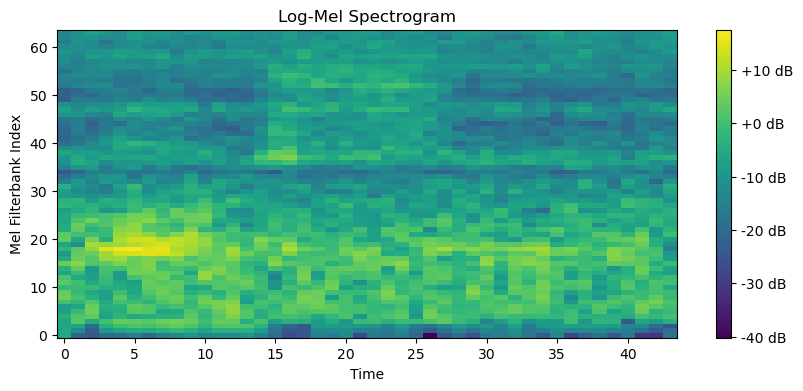

In [3]:
import torchaudio
import torch
import matplotlib.pyplot as plt

torch_test = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV\wav g4 VCV mask\S1aša.wav"

# Load the audio file
waveform, sample_rate = torchaudio.load(torch_test)


# Resample to a common sample rate (optional)
waveform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)

# Convert to mono if stereo
if waveform.shape[0] > 1:
    waveform = torch.mean(waveform, dim=0, keepdim=True)

# Compute the log-mel spectrogram
mel_specgram = torchaudio.transforms.MelSpectrogram(
    sample_rate=16000, n_fft=400, win_length=400, hop_length=160, n_mels=64
)(waveform)

# Convert to decibels
log_mel_specgram = torchaudio.transforms.AmplitudeToDB()(mel_specgram)

# Plot the log-mel spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(log_mel_specgram[0].numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.title('Log-Mel Spectrogram')
plt.xlabel('Time')
plt.ylabel('Mel Filterbank Index')
plt.colorbar(format='%+2.0f dB')
plt.show()


Plotting: SNR_-2 - aba
Glimpses shape before plotting: (129, 107)


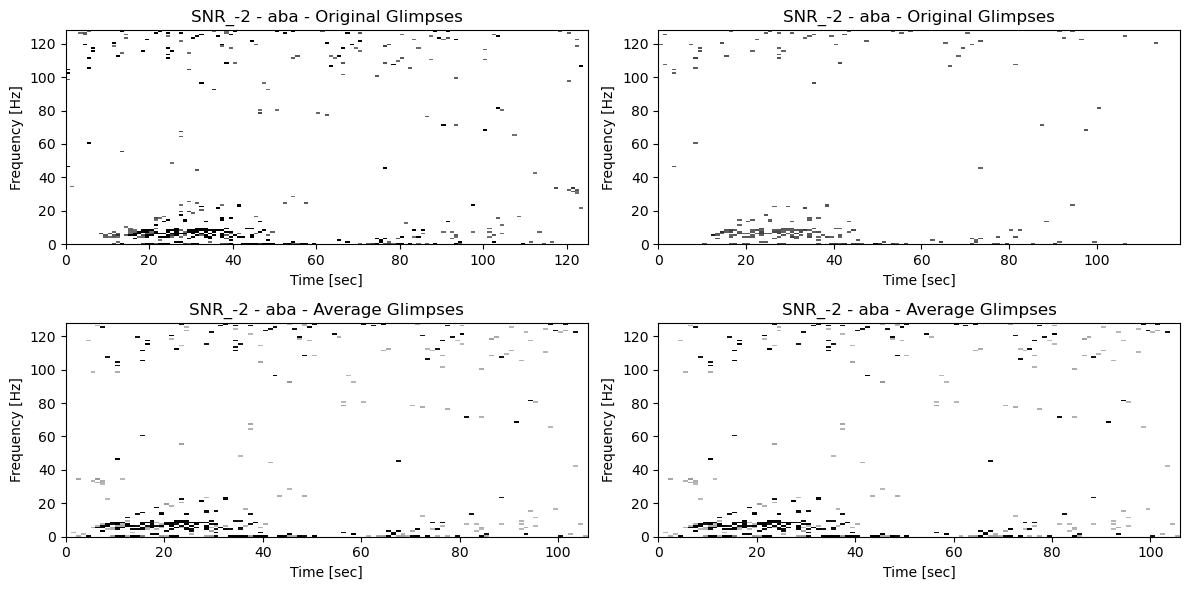

Plotting: SNR_-2 - aca
Glimpses shape before plotting: (129, 107)


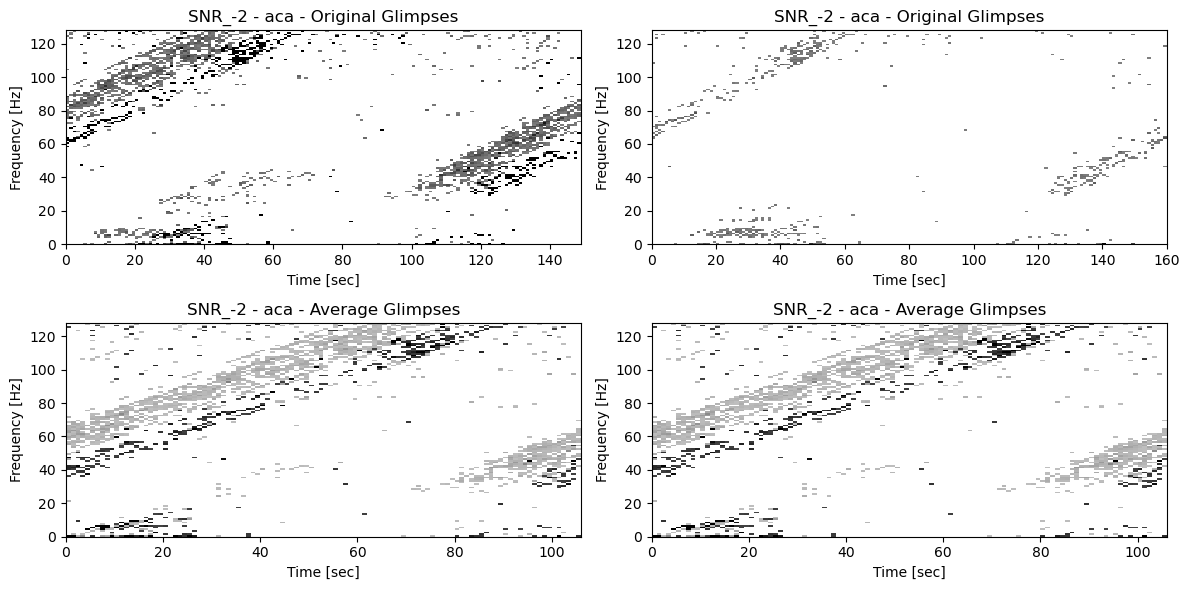

In [13]:
# Calculate the average glimpses
average_glimpses = calculate_average_glimpses(data, selected_speakers, selected_noise_condition)

# Visualize the averaged glimpses
for i, (stimulus, glimpses) in enumerate(average_glimpses.items()):
    if i >= 2:  # Only visualize the first two stimuli
        break
    
    print(f"Plotting: {selected_noise_condition} - {stimulus}")
    print("Glimpses shape before plotting:", glimpses.shape)
    
    # Define a reversed grayscale colormap
    reversed_gray_cmap = plt.cm.gray.reversed()
    
    plt.figure(figsize=(12, 6))
    
    # Plot original glimpses
    plt.subplot(2, 2, 1)
    plt.pcolormesh(data[selected_noise_condition][selected_speakers[0]][stimulus]['glimpses'], shading='nearest', cmap=reversed_gray_cmap, vmin=0, vmax=1)
    plt.title(f'{selected_noise_condition} - {stimulus} - Original Glimpses')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    
    plt.subplot(2, 2, 2)
    plt.pcolormesh(data[selected_noise_condition][selected_speakers[1]][stimulus]['glimpses'], shading='nearest', cmap=reversed_gray_cmap, vmin=0, vmax=1)
    plt.title(f'{selected_noise_condition} - {stimulus} - Original Glimpses')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    
    # Plot averaged glimpses
    plt.subplot(2, 2, 3)
    plt.pcolormesh(glimpses, shading='nearest', cmap=reversed_gray_cmap, vmin=0, vmax=1)
    plt.title(f'{selected_noise_condition} - {stimulus} - Average Glimpses')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    
    plt.subplot(2, 2, 4)
    plt.pcolormesh(glimpses, shading='nearest', cmap=reversed_gray_cmap, vmin=0, vmax=1)
    plt.title(f'{selected_noise_condition} - {stimulus} - Average Glimpses')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    
    plt.tight_layout()
    
    # Display the plots
    plt.show()


NameError: name 'reversed_gray_cmap' is not defined

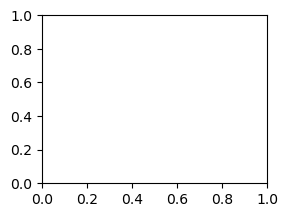

In [8]:
# Plot original glimpses
plt.subplot(2, 2, 1)
plt.imshow(data[selected_noise_condition][selected_speakers[0]][stimulus]['glimpses'], aspect='auto', cmap=reversed_gray_cmap, origin='lower', extent=[0, 1, 0, 1])
plt.title(f'{selected_noise_condition} - {stimulus} - Original Glimpses')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(2, 2, 2)
plt.imshow(data[selected_noise_condition][selected_speakers[1]][stimulus]['glimpses'], aspect='auto', cmap=reversed_gray_cmap, origin='lower', extent=[0, 1, 0, 1])
plt.title(f'{selected_noise_condition} - {stimulus} - Original Glimpses')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')


In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Define selected speakers and noise conditions
selected_speakers = ['govornik_1', 'govornik_3']
selected_noise_condition = 'SNR_-2'

# Function to calculate the average glimpses for each stimulus
def calculate_average_glimpses(data, selected_speakers, selected_noise_condition):
    average_glimpses = {}
    shortest_length = None
    
    # Find the shortest length
    for stimulus in data[selected_noise_condition][selected_speakers[0]]:
        glimpses_lengths = [len(data[selected_noise_condition][speaker][stimulus]['glimpses'][1]) for speaker in selected_speakers]  # Get the length along the second axis
        shortest_length = min(glimpses_lengths) if shortest_length is None else min(shortest_length, *glimpses_lengths)
    
    #print("Shortest length:", shortest_length)  # Add print statement to check the shortest length
    
    # Calculate the average glimpses for each stimulus
    for stimulus in data[selected_noise_condition][selected_speakers[0]]:
        glimpses_sum = None
        
        # Iterate over each speaker for the current stimulus
        for speaker in selected_speakers:
            glimpses = data[selected_noise_condition][speaker][stimulus]['glimpses']
            
            # Trim the glimpses array if its length is longer than the shortest length
            if len(glimpses[1]) > shortest_length:  # Check the length along the second axis
                trim_length = len(glimpses[1]) - shortest_length
                trim_start = trim_length // 2
                trim_end = len(glimpses[1]) - (trim_length - trim_start)
                glimpses = glimpses[:, trim_start:trim_end]  # Trim along the second axis
                
            # Initialize glimpses_sum if it's None
            if glimpses_sum is None:
                glimpses_sum = glimpses
            else:
                # Add the glimpses to the existing sum
                glimpses_sum += glimpses
        
        # Calculate the average glimpses for the current stimulus
        average_glimpses[stimulus] = glimpses_sum / len(selected_speakers)
    
    return average_glimpses

# Calculate the average glimpses
average_glimpses = calculate_average_glimpses(data, selected_speakers, selected_noise_condition)

# Visualize and save the averaged glimpses
for stimulus, glimpses in average_glimpses.items():
    
    print(f"Plotting: {selected_noise_condition} - {stimulus}")
    
    # Define a reversed grayscale colormap
    reversed_gray_cmap = plt.cm.gray.reversed()
    
    plt.figure(figsize=(10, 3))
    plt.pcolormesh(glimpses, shading='nearest', cmap=reversed_gray_cmap, vmin=0, vmax=1)
    
    plt.title(f'{selected_noise_condition} - {stimulus} - Average Glimpses')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.tight_layout()
    
    # Save the plot as a .png file in the current directory
    output_filename = f'{stimulus}_average_glimpses.png'.replace(' ', '_')
    plt.savefig(os.path.join(save5_png_path, output_filename), format='png', bbox_inches='tight')
    plt.close()


Plotting: SNR_-2 - aba
Plotting: SNR_-2 - aca
Plotting: SNR_-2 - ada
Plotting: SNR_-2 - afa
Plotting: SNR_-2 - aga
Plotting: SNR_-2 - aha
Plotting: SNR_-2 - aja
Plotting: SNR_-2 - aka
Plotting: SNR_-2 - ala
Plotting: SNR_-2 - ama
Plotting: SNR_-2 - ana
Plotting: SNR_-2 - apa
Plotting: SNR_-2 - ara
Plotting: SNR_-2 - asa
Plotting: SNR_-2 - ata
Plotting: SNR_-2 - ava
Plotting: SNR_-2 - aza
Plotting: SNR_-2 - ača
Plotting: SNR_-2 - ađa
Plotting: SNR_-2 - aša
Plotting: SNR_-2 - aža


# [7] USING PYTORCH TORCHAUDIO MEL LOG SPECTROGRAMS

Takes 48s to finish.

In [6]:
%%time

import torch
import torchaudio
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.io import wavfile
#from scipy.signal import stft

# Define parameters
speakers = ['govornik_1', 'govornik_2', 'govornik_3', 'govornik_4']
snr_conditions = ['SNR_-2', 'SNR_+0', 'SNR_+2']

# Map speaker to SSN_gX part
speaker_mapping = {
    'govornik_1': 'g1',
    'govornik_2': 'g2',
    'govornik_3': 'g3',
    'govornik_4': 'g4'
}

# Map SNR condition to the corresponding number
snr_mapping = {
    'SNR_-2': '70',
    'SNR_+0': '68',
    'SNR_+2': '66'
}

# SNR filename prefix mapping
snr_prefix_mapping = {
    'SNR_-2': 'S1',
    'SNR_+0': 'S2',
    'SNR_+2': 'S3'
}

# Base paths
base_path = r'C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\Diplomski Rad\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV\SSN all all'
base_speech_mask_path = r'C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\Diplomski Rad\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV'

n_fft = 400
win_length = 400
hop_length = 160
n_mels = 64

# Initialize the data dictionary
data = {snr: {speaker: {} for speaker in speakers} for snr in snr_conditions}

def process_and_store_data(speaker, snr_condition, stimulus, speech_mask_file_path, mask, sr, snr_prefix):
    # Load the speech + mask audio file
    speech_mask, sr = torchaudio.load(speech_mask_file_path)

    # Determine the minimum length of the audio files
    min_length_audio = min(mask.size(1), speech_mask.size(1))

    # Trim the audio files to the minimum length
    mask = mask[:, :min_length_audio]
    speech_mask = speech_mask[:, :min_length_audio]

    # Convert to log-mel spectrograms
    mel_transform = torchaudio.transforms.MelSpectrogram(sample_rate=sr,
                                                         n_fft=n_fft,
                                                         win_length=win_length,
                                                         hop_length=hop_length,
                                                         n_mels=n_mels)
    
    mask_mel = mel_transform(mask)
    speech_mask_mel = mel_transform(speech_mask)

    # Convert to decibels
    log_mask_mel = torchaudio.transforms.AmplitudeToDB()(mask_mel)
    log_speech_mask_mel = torchaudio.transforms.AmplitudeToDB()(speech_mask_mel)

    # Calculate SNR
    snr = log_speech_mask_mel - log_mask_mel
    #snr = speech_mask_mel - mask_mel

    # Normalize SNR values to the range [0, 1]
    snr_normalized = (snr - snr.min()) / (snr.max() - snr.min())

    # Set values where SNR <= 3 to 0
    #glimpses = torch.where(snr > 3, snr_normalized, torch.zeros_like(snr))
    glimpses = torch.where(snr > 3, snr, torch.zeros_like(snr))

    # Store the data in the dictionary
    data[snr_condition][speaker][stimulus] = {
        'original': speech_mask,
        'mask': mask,
        'glimpses': glimpses
    }

    # Visualize the glimpses on the spectrogram
    plt.figure(figsize=(8, 6))
    plt.imshow(glimpses.squeeze().numpy(), cmap='gray_r', aspect='auto', origin='lower')
    title = f'{snr_prefix}{stimulus}'
    plt.title(title + ' - Glimpses (SNR > 3 dB)')
    plt.ylabel('Mel Filterbank Index')
    plt.xlabel('Time [frames]')
    plt.tight_layout()
    
    # Save the plot as a .png file in the same directory, including the SNR prefix
    output_filename = os.path.join(os.path.dirname(speech_mask_file_path), f'{title}.png'.replace(' ', '_'))
    plt.savefig(output_filename, format='png', bbox_inches='tight')
    plt.close()  # Close the plot to free memory


# Iterate over all speakers and SNR conditions
for speaker in speakers:
    for snr_condition in snr_conditions:
        ssn_part = speaker_mapping[speaker]
        snr_number = snr_mapping[snr_condition]

        # Construct the mask_dir path using string formatting
        mask_dir = f'{base_path}\SSN_{ssn_part}_{snr_number}.wav'
        
        # Construct the speech_mask_dir path using string formatting
        speech_mask_folder_mapping = {
            'govornik_1': 'wav g1 VCV mask',
            'govornik_2': 'wav g2 VCV mask',
            'govornik_3': 'wav g3 VCV mask',
            'govornik_4': 'wav g4 VCV mask'
        }
        speech_mask_folder = speech_mask_folder_mapping[speaker]
        speech_mask_dir = os.path.join(base_speech_mask_path, speech_mask_folder)

        print(f"Processing speaker: {speaker}, SNR condition: {snr_condition}\n")

        # Load the mask file
        mask, sr = torchaudio.load(mask_dir)

        # Get the correct SNR prefix for the current SNR condition
        snr_prefix = snr_prefix_mapping[snr_condition]

        # List all files in the speaker's directory
        speech_mask_filenames = [f for f in os.listdir(speech_mask_dir) if f.endswith('.wav') and f.startswith(snr_prefix)]

        print(f"speech_mask_filenames: {speech_mask_filenames[:2]} ... (total {len(speech_mask_filenames)})\n")

        # Process each file
        for speech_mask_filename in speech_mask_filenames:
            speech_mask_file_path = os.path.join(speech_mask_dir, speech_mask_filename)
            stimulus = os.path.splitext(speech_mask_filename)[0][2:]  # Extract the stimulus part of the filename
            process_and_store_data(speaker, snr_condition, stimulus, speech_mask_file_path, mask, sr, snr_prefix)

# Check data dictionary content
print(f"\nlen(data): {len(data)}")
print(f"data.keys(): {data.keys()}\n")


Processing speaker: govornik_1, SNR condition: SNR_-2

speech_mask_filenames: ['S1aba.wav', 'S1aca.wav'] ... (total 21)



C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (64) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Processing speaker: govornik_1, SNR condition: SNR_+0

speech_mask_filenames: ['S2aba.wav', 'S2aca.wav'] ... (total 21)

Processing speaker: govornik_1, SNR condition: SNR_+2

speech_mask_filenames: ['S3aba.wav', 'S3aca.wav'] ... (total 21)

Processing speaker: govornik_2, SNR condition: SNR_-2

speech_mask_filenames: ['S1aba.wav', 'S1aca.wav'] ... (total 21)

Processing speaker: govornik_2, SNR condition: SNR_+0

speech_mask_filenames: ['S2aba.wav', 'S2aca.wav'] ... (total 21)

Processing speaker: govornik_2, SNR condition: SNR_+2

speech_mask_filenames: ['S3aba.wav', 'S3aca.wav'] ... (total 21)

Processing speaker: govornik_3, SNR condition: SNR_-2

speech_mask_filenames: ['S1aba.wav', 'S1aca.wav'] ... (total 21)

Processing speaker: govornik_3, SNR condition: SNR_+0

speech_mask_filenames: ['S2aba.wav', 'S2aca.wav'] ... (total 21)

Processing speaker: govornik_3, SNR condition: SNR_+2

speech_mask_filenames: ['S3aba.wav', 'S3aca.wav'] ... (total 21)

Processing speaker: govornik_4, 

## Verify dict is good

In [ ]:
# Function to print sample data points
def print_sample_data(data, num_samples=3):
    for snr_condition, snr_data in data.items():
        print(f"SNR Condition: {snr_condition}")
        for speaker, speaker_data in snr_data.items():
            print(f"\tSpeaker: {speaker}")
            for stimulus, stimulus_data in speaker_data.items():
                print(f"\t\tStimulus: {stimulus}")
                print(f"\t\t\tOriginal Shape: {stimulus_data['original'].shape}")
                print(f"\t\t\tMask Shape: {stimulus_data['mask'].shape}")
                print(f"\t\t\tGlimpses Shape: {stimulus_data['glimpses'].shape}")
                print(f"\t\t\tGlimpses Example:")
                print(stimulus_data['glimpses'][:8, :5])  # Print a small portion of the glimpses
                #print(f"\t\t\tTime: {stimulus_data['time'].shape}")  # Print the shape of time array
                #print(f"\t\t\tFrequency: {stimulus_data['frequency'].shape}")  # Print the shape of frequency array
                num_samples -= 1
                if num_samples <= 0:
                    return

# Call the function to print sample data points
print_sample_data(data)


## Save new dict (458MB)

In [26]:
import pickle
output_file_path_base = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV"
dictionary_name_version = f"\Mel_data_dict-{work_version}.pkl"

output_file_path = output_file_path_base + dictionary_name_version

# Save the dictionary using pickle
with open(output_file_path, "wb") as file:
    pickle.dump(data, file)

print(f"Dictionary saved to {output_file_path}")

Dictionary saved to C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV\Mel_data_dict-v4.1.pkl


## Load old dict

In [8]:
import pickle
output_file_path_base = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV"
dictionary_name_version = f"\Mel_data_dict-{work_version}.pkl"

old_default = r"\Mel_data_dict-v4.1.pkl"

output_file_path = output_file_path_base + dictionary_name_version

with open(output_file_path, "rb") as file:
    data = pickle.load(file)

print(f"Dictionary loaded successfully! ({dictionary_name_version})")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Mr Cab Driver\\Documents\\A FAKS FFZG\\Diplomski\\Fonetika\\DIPLOMSKI RAD\\Govorni materijal\\Audio snimke govornika GM\\Obrada 3 VCV\\Mel_data_dict-v4.3.pkl'

# [8] Combining three avgMFCC as PNGs (across SNRs) works like a charm

## Glimpse avgMFCC GENERATE

In [9]:
import numpy as np
import torch
import torchaudio
import os
import matplotlib.pyplot as plt

# Function to find the longest time length
def find_longest_time_length(data, selected_speakers, selected_noise_condition):
    longest_length = 0
    for stimulus in data[selected_noise_condition][selected_speakers[0]]:
        for speaker in selected_speakers:
            glimpses_length = data[selected_noise_condition][speaker][stimulus]['glimpses'].shape[2]  # Get the length along the time axis
            if glimpses_length > longest_length:
                longest_length = glimpses_length
    return longest_length

# Function to pad glimpses to the longest time length equally on both sides
def pad_glimpses(glimpses, longest_length):
    current_length = glimpses.shape[1]
    if current_length < longest_length:
        total_padding = longest_length - current_length
        left_padding = total_padding // 2
        right_padding = total_padding - left_padding
        pad_width = ((0, 0), (left_padding, right_padding))
        return np.pad(glimpses, pad_width, mode='constant', constant_values=0)
    else:
        return glimpses

# Function to calculate the average glimpses for each stimulus
def calculate_average_glimpses(data, selected_speakers, selected_noise_condition):
    average_glimpses = {}
    longest_length = find_longest_time_length(data, selected_speakers, selected_noise_condition)
    
    # print(f"Longest time length found: {longest_length}")

    # Pad the glimpses and calculate the average glimpses for each stimulus
    for stimulus in data[selected_noise_condition][selected_speakers[0]]:
        glimpses_sum = None
        
        # Iterate over each speaker for the current stimulus
        for speaker in selected_speakers:
            glimpses = data[selected_noise_condition][speaker][stimulus]['glimpses'].squeeze().numpy()  # Ensure it's a 2D array
            padded_glimpses = pad_glimpses(glimpses, longest_length)
            
            # print(f"Speaker: {speaker}, Stimulus: {stimulus}, Original shape: {glimpses.shape}, Padded shape: {padded_glimpses.shape}")

            # Initialize glimpses_sum if it's None
            if glimpses_sum is None:
                glimpses_sum = padded_glimpses
            else:
                # Add the padded glimpses to the existing sum
                glimpses_sum += padded_glimpses
        
        # Calculate the average glimpses for the current stimulus
        average_glimpses[stimulus] = glimpses_sum / len(selected_speakers)
    
    return average_glimpses

print("Functions online.")

Functions online.


In [41]:
save9_png_path = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV\PNG analiza mel3"
print(f"Saving to folder...\n {save9_png_path}")

Saving to folder...
 C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV\PNG analiza mel3


## A bit of fun before generation (Custom tick marks)

In [42]:
import numpy as np

# Constants
sample_rate = 44100
max_freq = 22050  # Half of the sample rate (Nyquist frequency)
n_mels = 64
tick_number = 6  # Number of ticks you want on the plot

# Convert max frequency to Mel scale
max_mel = 2595 * np.log10(1 + max_freq / 700)

# Compute the spacing between each Mel frequency bin
mel_bin_width = max_mel / (n_mels - 1)

# Generate Mel frequency bin values and round them to the nearest integer
mel_bins = [int(round(mel_bin_width * i)) for i in range(n_mels)]

# Convert Mel frequency bins back to Hz for plotting and round to nearest integer
freq_bins = [int(round(700 * (10**(mel/2595) - 1))) for mel in mel_bins]

print(f"Mel frequency bins (rounded): {len(mel_bins)}")
print(f"Corresponding frequency bins (Hz, rounded): {len(freq_bins)} \n")
# print(f"Mel frequency bins (rounded): {mel_bins}")
# print(f"Corresponding frequency bins (Hz, rounded): {freq_bins}")

# Function to select equidistant ticks
def select_ticks(freq_bins, tick_number):
    indices = np.linspace(0, len(freq_bins) - 1, tick_number, dtype=int)
    selected_ticks = [freq_bins[i] for i in indices]
    return selected_ticks

# Select ticks
selected_ticks = select_ticks(freq_bins, tick_number)

print(f"Selected ticks (Hz): {selected_ticks}")
selected_ticks = [0, 600, 2000, 4700, 10000, 22000]
print(f"Selected ticks (Hz): {selected_ticks}")

Mel frequency bins (rounded): 64
Corresponding frequency bins (Hz, rounded): 64 

Selected ticks (Hz): [0, 658, 2087, 4707, 10394, 22043]
Selected ticks (Hz): [0, 600, 2000, 4700, 10000, 22000]


In [79]:
import numpy as np

# Define your parameters
sr = 44100
hop_length = 160
win_length = 400

# Example glimpses shape (this would come from your data)
glimpses_shape_1 = 128  # Example value, replace with glimpses.shape[1] from your actual data

# Calculate duration per frame
duration_per_frame = hop_length / sr

# Calculate total duration
total_duration = glimpses_shape_1 * duration_per_frame

# Define the number of ticks
num_ticks = 6

# Calculate tick positions and labels
tick_positions = np.linspace(0, glimpses_shape_1, num_ticks)
tick_labels = [f"{tick:.2f} s" if idx == num_ticks - 1 else f"{tick:.2f}" for idx, tick in enumerate(np.linspace(0, total_duration, num_ticks))]

print(f"selected tick_labels {tick_labels}")

selected tick_labels ['0.00', '0.09', '0.19', '0.28', '0.37', '0.46 s']


# The Generation of PNGs

In [80]:
samplerate_path = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Govorni materijal\Audio snimke govornika GM\Obrada 3 VCV"
samplerate_path2 = samplerate_path + "\wav g4 VCV mask"

selected_speakers = ['govornik_1', 'govornik_2','govornik_3', 'govornik_4']

speaker_folders = ["1", "2", "3", "4"]


_, sr = torchaudio.load(samplerate_path2 + r"\S3aca.wav")

longest_duration = 0
longest_filename = None

for speeks in speaker_folders:
    # Iterate over all files in the directory
    for filename in os.listdir(samplerate_path2):
        # Check if the file is a WAV file
        if filename.endswith(".wav"):
            # Get the full path to the WAV file

            speeko = f"\wav g{speaker_folders[int(speeks)-1]} VCV mask"

            speeks_path = samplerate_path + speeko

            file_path = os.path.join(speeks_path, filename)
            
            #print(file_path)
            
            # Get information about the WAV file
            info = torchaudio.info(file_path)
            
            # Calculate the duration of the WAV file in seconds
            duration_seconds = info.num_frames / info.sample_rate
            
            # Check if this file has the longest duration so far
            if duration_seconds > longest_duration:
                longest_duration = duration_seconds
                longest_filename = filename 

print(f"Longest filename: {speeko}\ {longest_filename}")
print(f"Duration of the audio: {duration_seconds:.4f} seconds\n")


Longest filename: \wav g4 VCV mask\ S1aca.wav
Duration of the audio: 0.4363 seconds



In [81]:
%%time

###### TIME TO GENERATE A BUNCH OF PNGs ##########
#################################################

def return_long_lenght(data, selected_speakers, selected_noise_condition):
    longest_length = find_longest_time_length(data, selected_speakers, selected_noise_condition)
    return longest_length

print(f"Data from MFCC generation:\n sample rate: {sr}\n  n_fft {n_fft}\n win_length {win_length}\n hop_length {hop_length}\n n_mels {n_mels}\n ")

# Assuming you have a list of frequencies in kHz
frequencies_kHz = [0, 4, 8, 12, 16, 22]

# selected_ticks = [0, 600, 2000, 4700, 10000, 22000]
selected_ticks = [0, "0.6", "2.0", "4.7", "10", "22 kHz"]


mel_min = 0  # Minimum frequency in Mel scale
mel_max = 2595 * np.log10(1 + 22 / 700)  # Maximum frequency in Mel scale
mel_freq_plot = np.linspace(mel_min, mel_max, len(frequencies_kHz))


for stimulus in calculate_average_glimpses(data, selected_speakers, snr_conditions[0]).keys():
    fig, axes = plt.subplots(len(snr_conditions), 1, figsize=(8, 6 * len(snr_conditions)), sharex=True, sharey=True)
    
    for i, snr_condition in enumerate(snr_conditions):
        average_glimpses = calculate_average_glimpses(data, selected_speakers, snr_condition)
        glimpses = average_glimpses[stimulus]

        #print(i)

        if i == 0:
            longest_length = return_long_lenght(data, selected_speakers, snr_condition)
        
        ax = axes[i]
        cax = ax.pcolormesh(range(glimpses.shape[1]), range(glimpses.shape[0]), glimpses, shading='nearest', cmap='gray_r', vmin=0, vmax=1)
      
        # Replace underscores with spaces in snr_condition
        formatted_snr_condition = snr_condition.replace("_", " ")
        
        # Add a suffix string
        suffix_dB = "dB"  # Replace this with your desired suffix
        title_snr = f'{formatted_snr_condition} {suffix_dB}'
        
        # Set the title with the modified string
        ax.set_title(title_snr, fontsize=22, weight='bold', loc='left')

        # Create a second y-axis with a different scale
        ax2 = ax.twinx()
        ax2.set_ylim(0, n_mels - 1)  # Set the custom range for the second y-axis
        ax2.set_yticks(np.linspace(0, n_mels - 1, tick_number))  # Set custom ticks for the second y-axis
        ax2.set_yticklabels(selected_ticks, fontsize=10)  # Set custom tick labels for the second y-axis

        if i == 2:
            ax.xaxis.set_visible(True)
        else:
            ax.xaxis.set_visible(False)
            
        if i % 3 == 0:
                ax3 = ax.twiny()
                ax3.set_xlim(0, glimpses.shape[1])  # Set the custom range for the third x-axis
                ax3.set_xticks(tick_positions)  # Set custom ticks for the third x-axis
                ax3.set_xticklabels(tick_labels, fontsize=10)  # Set custom tick labels for the third x-axis
        
        if i == len(snr_conditions) // 2:
            str_ylabel = f"Mel Filterbanka ({n_mels} filtera)"
            ax.set_ylabel(str_ylabel, fontsize=18)  # Customizing ylabel font size
        
       #ax2.set_ylabel("kHz", fontsize=18, labelpad=20, loc="center", rotation=0)  # Custom label for the second y-axis
            
        
    # Common xlabel
    str_xlabel = f"Vrijeme ({longest_length} koraka)"
    fig.text(0.5, 0.07, str_xlabel, ha='center', fontsize=18, va='bottom')  # Customizing xlabel font size and aligning to the bottom
    
    # Add custom text above the stack
    title_card = f"/{stimulus}/"
    fig.text(0.5, 0.91, title_card, ha='center', fontsize=50, weight='bold')

    
    bottom_text_version = f"Version: {work_version}\n"
    mfcc_data_text = f"DATA: sr: {sr} | n_fft {n_fft}| n_mels {n_mels} | win_len {win_length} | hop_len {hop_length}"
    bottom_text = bottom_text_version + mfcc_data_text
    
    fig.text(0.5, 0.005, bottom_text, ha='center', fontsize=12, fontweight='bold')

    
    # Save the plot as a .png file in the current directory
    speaker_suffix = '+'.join([speaker_mapping[speaker] for speaker in selected_speakers])
    snr_prefix = '_'.join([snr_prefix_mapping[snr] for snr in snr_conditions])
    
    output_filename_png = f'{stimulus}_combined_avg_glimpses_{snr_prefix}-{speaker_suffix}_{work_version}.png'.replace(' ', '_')
    save_png_string = os.path.join(save9_png_path, output_filename_png)
    
    fig.savefig(save_png_string, format='png', bbox_inches='tight')
    
    # Close the figure
    plt.close(fig)


print(f"longest_length: {longest_length} frames")

print(f"alot generated")


Data from MFCC generation:
 sample rate: 44100
  n_fft 400
 win_length 400
 hop_length 160
 n_mels 64
 
longest_length: 128 frames
alot generated
CPU times: total: 9.17 s
Wall time: 9.25 s


## Bring up a PNG to check

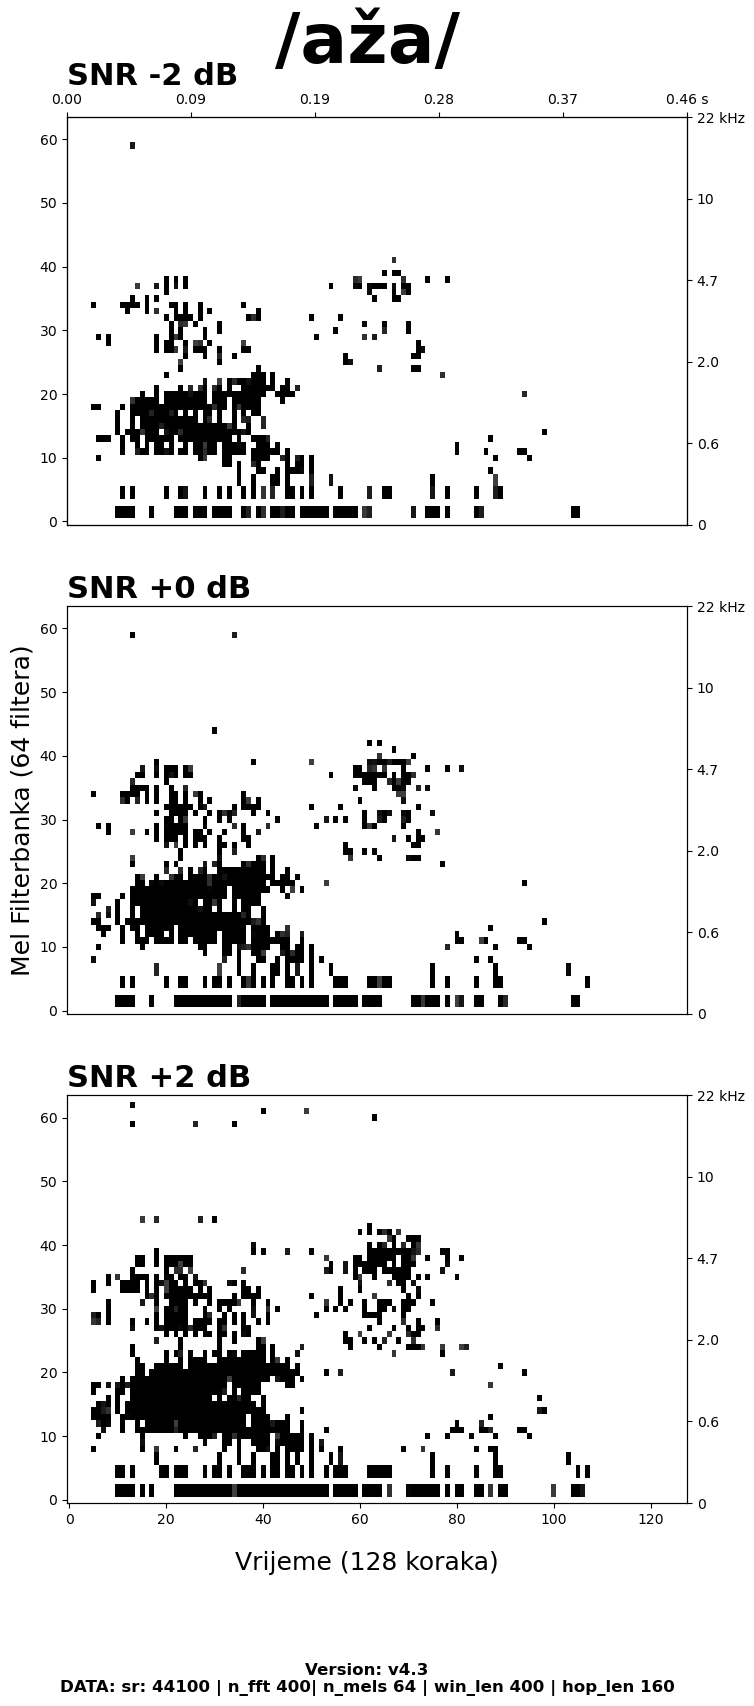

In [82]:
from IPython.display import Image

Image(save_png_string)

# x scraps to delete later